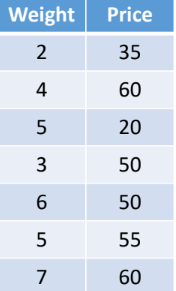

**Task 01:**
Your objective is to manually compute the slope (M) and y-intercept (C) using
Ordinary Least Squares Linear Regression. Once determined, apply these values to
predict the price when the vegetable weight is 6.50

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = np.array([2,4,5,3,6,5,7])
y = np.array([35,60,20,50,50,55,60])

In [3]:
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x2 = np.sum(x**2)
M = (n*sum_xy - sum_x*sum_y)/(n*sum_x2 - sum_x**2)
print(f"slope: {M}")
C = (sum_y - M*sum_x)/n
print(f"y-intercept: {C}")
price = M*6.50 + C
print(f"price when the vegetable weight is 6.50: {price}")

slope: 2.620967741935484
y-intercept: 35.16129032258065
price when the vegetable weight is 6.50: 52.197580645161295


**Task 02:**
Compute the residuals for each data point.

In [4]:
# prediction for each data point
y1 = M*2 + C
y2 = M*4 + C
y3 = M*5 + C
y4 = M*3 + C
y5 = M*6 + C
y6 = M*5 + C
y7 = M*7 + C
# residual for each data point
e1 = 35 - y1
e2 = 60 - y2
e3 = 20 - y3
e4 = 50 - y4
e5 = 50 - y5
e6 = 55 - y6
e7 = 60 - y7

print(f"residuals for each data point: {e1}, {e2}, {e3}, {e4}, {e5}, {e6}, {e7}")

residuals for each data point: -5.403225806451616, 14.354838709677416, -28.266129032258064, 6.975806451612897, -0.8870967741935516, 6.733870967741936, 6.491935483870961


**Task 03:**
Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [5]:
MSE = (e1**2+e2**2+e3**2+e4**2+e5**2+e5**2+e6**2+e7**2)/n
MAE = (abs(e1)+abs(e2)+abs(e3)+abs(e4)+abs(e5)+abs(e6)+abs(e7))/n
print(f"Mean Squared Error(MSE): {MSE}, Mean Absolute Error(MAE): {MAE}")

Mean Squared Error(MSE): 167.42232793221345, Mean Absolute Error(MAE): 9.87327188940092


**Final Task:**
Generate an Excel file for the given dataset. Utilize Python for all the calculations.

In [6]:
data = {'Weight': [2, 4, 5, 3, 6, 5, 7],
       'Price': [35, 60, 20, 50, 50, 55, 60]}
df = pd.DataFrame(data)
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [7]:
# Libraries like scikit-learn expect features (X) as a 2D array (even if just one feature) and target (y) as a 1D array.
X = df[['Weight']]  
print(X)
y = df['Price']  
print(y)

   Weight
0       2
1       4
2       5
3       3
4       6
5       5
6       7
0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
slope_sklearn = model.coef_
print(f"slope: {slope_sklearn}")
intercept_sklearn = model.intercept_
print(f"y intercept: {intercept_sklearn}")

slope: [2.62096774]
y intercept: 35.16129032258065


In [9]:
model.predict(X)

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [10]:
data = {'x': [2, 4, 5, 3, 6, 5, 7],
       'y': [35, 60, 20, 50, 50, 55, 60],
       'y_hat': [40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452] }
df = pd.DataFrame(data)
df

,x,y,y_hat
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [11]:
df['residuals'] = df['y'] - df['y_hat']
df

,x,y,y_hat,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [12]:
MSE_sklearn = (df['residuals']**2).sum()
MAE_sklearn = df['residuals'].abs().sum()
print(f"Mean Squared Error(MSE): {MSE_sklearn}, Mean Absolute Error(MAE): {MAE_sklearn}")

Mean Squared Error(MSE): 1171.1693547088714, Mean Absolute Error(MAE): 69.11290322


In [15]:
df.to_excel("output.xlsx", index=False)